In [1]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

from PIL import Image
import numpy as np

# Fix error: module 'numpy' has no attribute 'bool' when using numpy 1.24.0+
# Or insyall numpy==1.23.1
np.bool = np.bool_

# Fix error: module 'PIL.Image' has no attribute 'ANTIALIAS'
Image.ANTIALIAS = Image.LANCZOS

In [2]:
config = Cfg.load_config_from_name('vgg_transformer')

In [3]:
dataset_params = {
        'name': 'hw',
        'data_root': './datasets/',
        'train_annotation': 'train_line_annotation.txt',
        'valid_annotation': 'test_line_annotation.txt'
    }

params = {
    'print_every': 200,
    'valid_every': 15*200,
    # 'iters': 20000,
    'iters': 20,
    'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
    'export': './weights/transformerocr.pth',
    # 'metrics': 10000,
    'metrics': 10,
    # 'weights': './models/pretrained/vgg_transformer.pth',
}

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cpu'
# Fix TypeError: cannot pickle 'Environment' object when PC have not GPU -> set num_workers = 0 in Dataloader
config['dataloader']['num_workers'] = 0

In [4]:
trainer = Trainer(config, pretrained=True)

c:\Users\tuyetmai\Desktop\web\research\training\vietocr\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tuyetmai\Desktop\web\research\training\vietocr\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\tuyetmai\Desktop\web\research\training\vietocr\.venv\lib\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference perform

Model weight C:\Users\tuyetmai\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|████████████████████████████████| 5482/5482 [00:00<00:00, 37292.92it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|████████████████████████████████| 1812/1812 [00:00<00:00, 62484.21it/s]


In [5]:
trainer.config.save('config.yml')

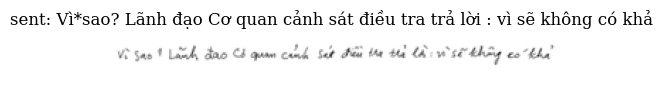

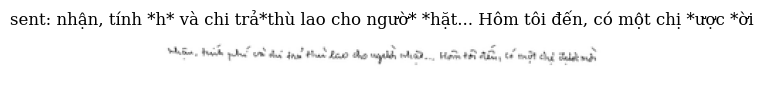

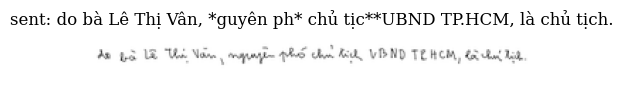

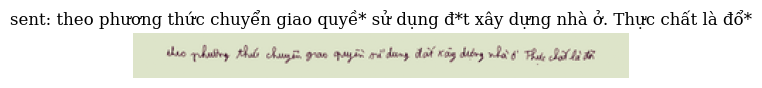

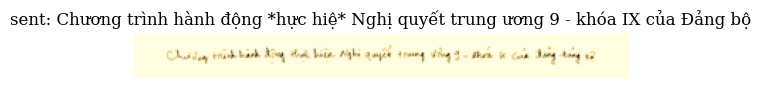

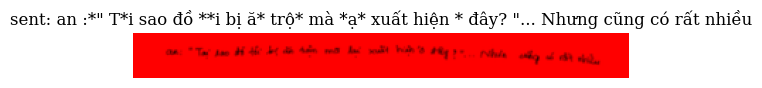

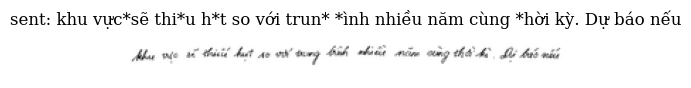

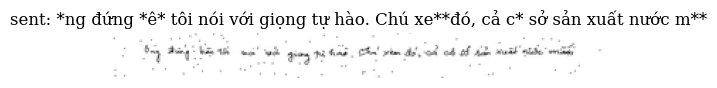

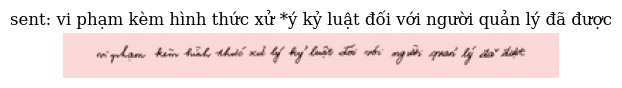

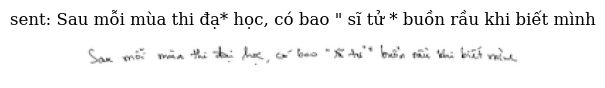

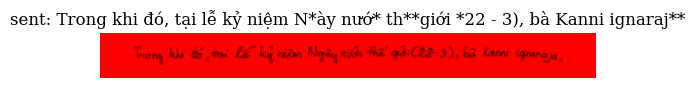

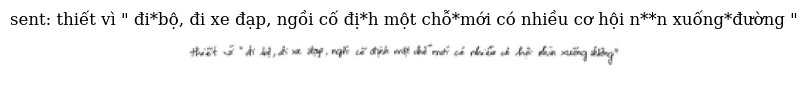

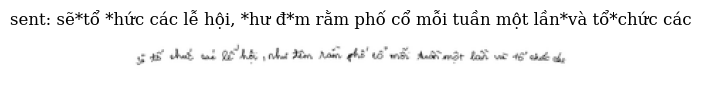

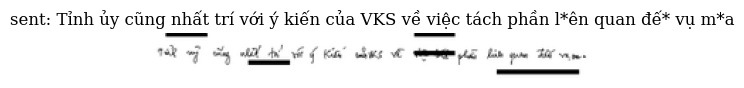

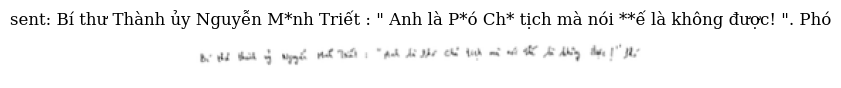

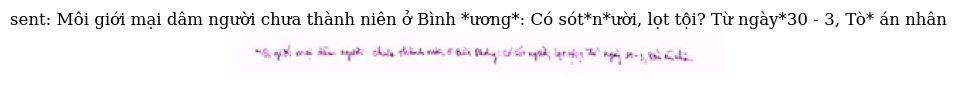

In [6]:
trainer.visualize_dataset()

In [7]:
trainer.train()

c:\Users\tuyetmai\Desktop\web\research\training\vietocr\.venv\lib\site-packages\torch\nn\functional.py:5076: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


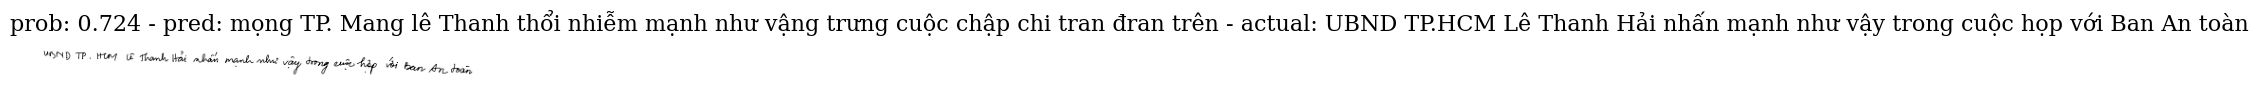

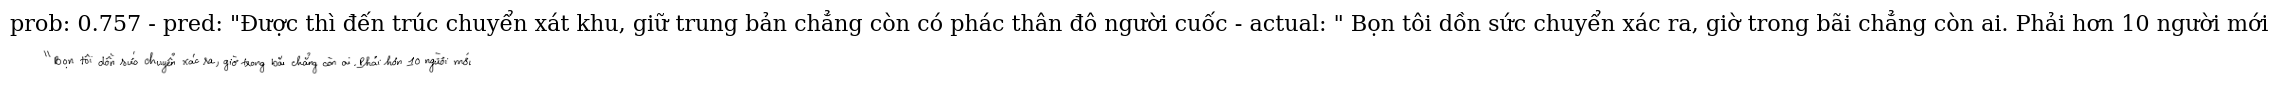

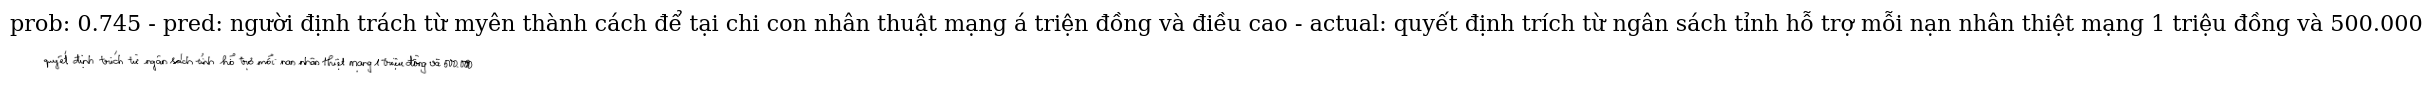

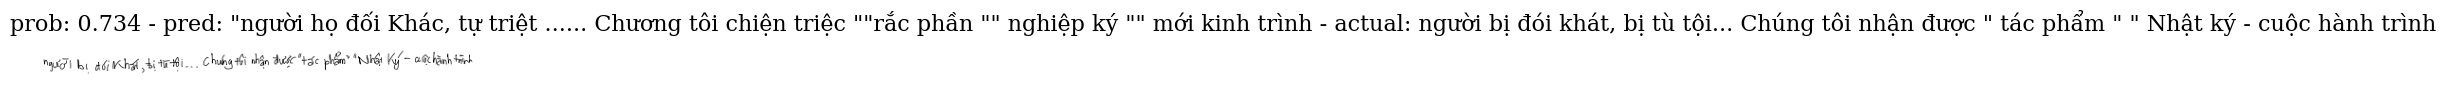

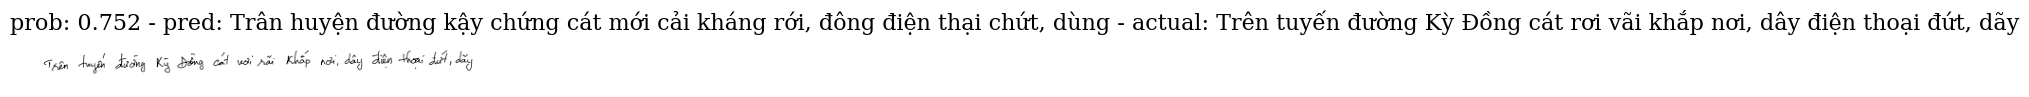

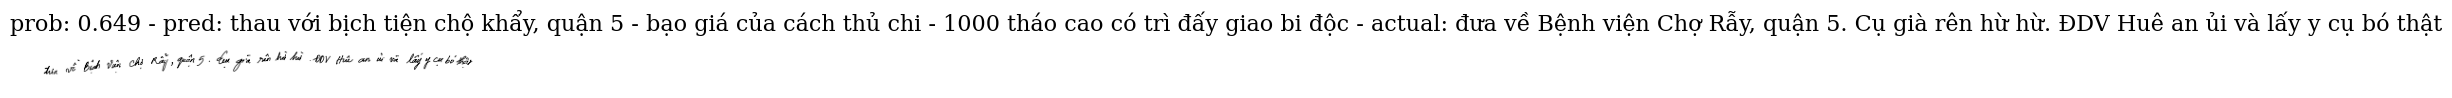

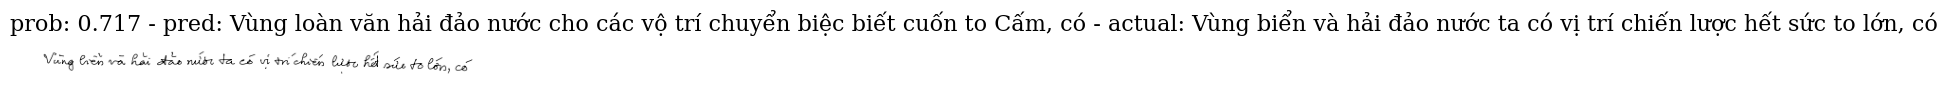

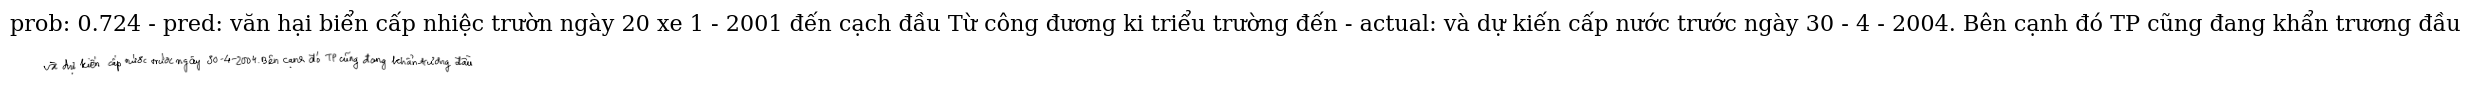

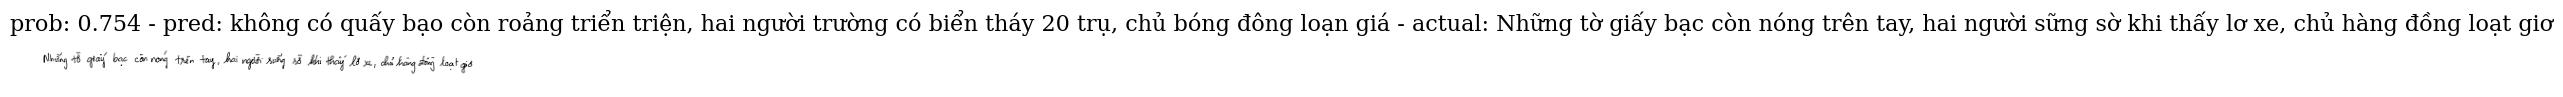

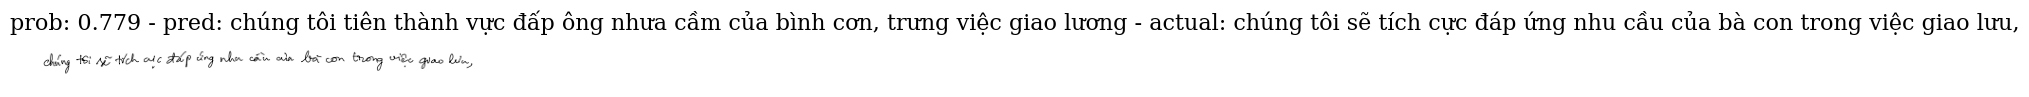

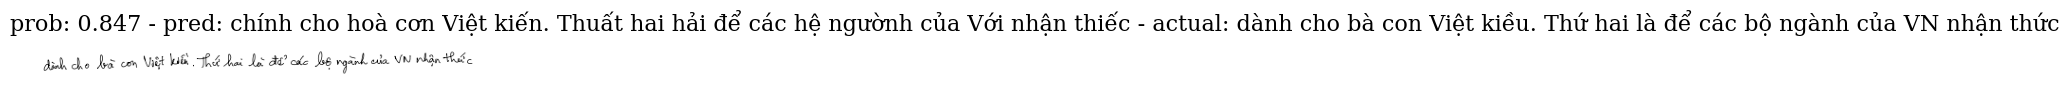

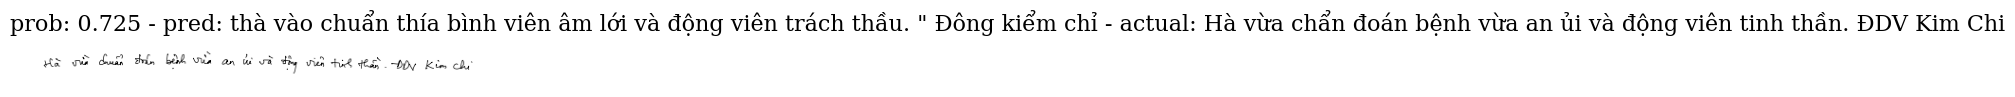

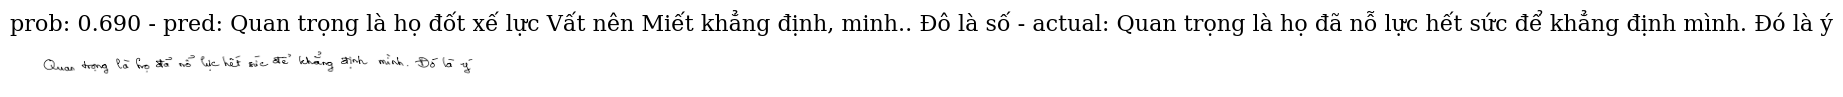

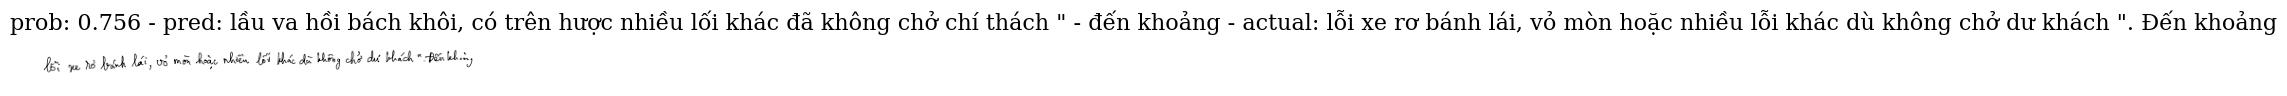

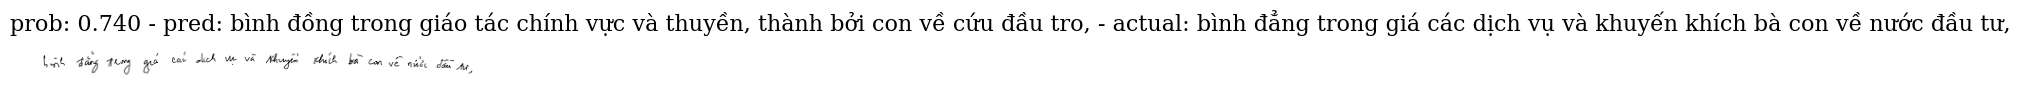

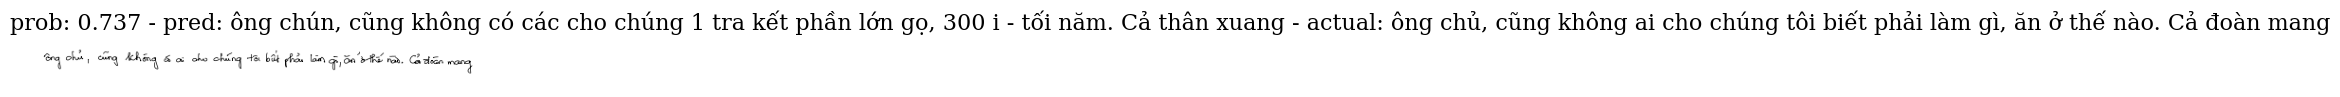

In [8]:
trainer.visualize_prediction()

In [9]:
trainer.precision()

(0.0, 0.15970032)